In [6]:
import cv2
import pandas as pd
import numpy as np
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage import data
from skimage.color import label2rgb
import matplotlib.patches as mpatches

In [222]:
# image = data.coins()[50:-50, 50:-50]
image_path = "../data/stage2_test_concatenated_labels/0a8dfb6763ec049b57454e6b5605f872cdf41cd13951fb2a2f31a6e3c8667712.png"

In [223]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [224]:
np.unique(image)

array([129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)

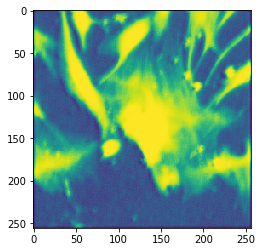

In [225]:
plt.imshow(image)
plt.show()

In [226]:
# apply threshold
thresh = threshold_otsu(image)
if thresh:
    bw = closing(image > thresh, square(3))
else:
    ret, bw = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
201


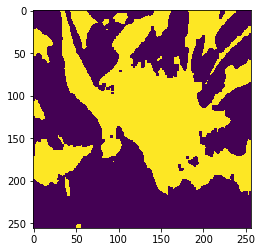

In [231]:
print(bw)
plt.imshow(bw)
print(thresh)

# remove artifacts connected to image border
cleared = clear_border(bw)

print(clear_border.__doc__)
plt.imshow(cleared)

In [2]:
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
#     print(run_lengths)
    return run_lengths

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[8193, 2, 8449, 8, 8705, 32, 8740, 19, 8961, 56, 9217, 60, 9285, 1, 9473, 78, 9732, 75, 9993, 76, 10254, 76, 10514, 75, 10772, 76, 11031, 75, 11291, 71, 11552, 67, 11811, 64, 12073, 59, 12331, 57, 12590, 56, 12848, 54, 13107, 53, 13365, 52, 13622, 52, 13880, 51, 14138, 51, 14396, 49, 14653, 49, 14911, 47, 15170, 45, 15428, 43, 15685, 44, 15943, 43, 16200, 43, 16459, 41, 16716, 42, 16974, 41, 17232, 40, 17491, 38, 17749, 38, 18007, 37, 18265, 35, 18522, 35, 18779, 36, 19036, 36, 19292, 37, 19550, 38, 19799, 1, 19806, 40, 20052, 5, 20063, 40, 20306, 7, 20319, 42, 20561, 8, 20576, 43, 20639, 6, 20816, 7, 20832, 56, 20894, 10, 20908, 3, 21071, 8, 21088, 57, 21149, 18, 21326, 9, 21343, 58, 21404, 19, 21581, 10, 21598, 81, 21836, 11, 21852, 83, 22092, 16, 22111, 80, 22347, 17, 22367, 80, 22602, 18, 22623, 80, 22858, 16, 22879, 79, 23113, 

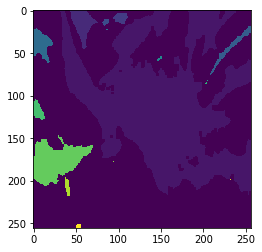

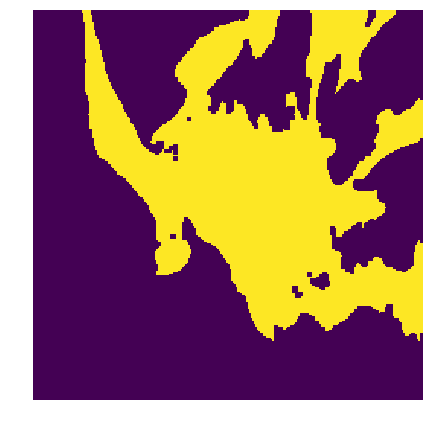

In [233]:
# label image regions
label_image = label(bw)
plt.imshow(label_image)
imag_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(imag_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    temp_image_null = np.zeros(label_image.shape)
    for coord in region.coords:
        temp_image_null[coord[0]][coord[1]] = 1
    print(temp_image_null)
    plt.imshow(temp_image_null)
    rle_encoding(temp_image_null)
    break
#     print(region.coords)
#     print(mpatches.Polygon.__doc__)
#     print(dir(mpatches.Polygon))
#     break
#     if region.area >= 5:
#         # draw rectangle around segmentaed coins
#         minr, minc, maxr, maxc = region.bbox
#         rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [4]:
import glob

In [14]:
df_array = []
image_count = 0
for image in glob.glob("../data/"):
    image_count += 1
    image_path = image
    
    # convert image to bw
    input_image = cv2.imread(image_path)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    # apply threshold
    thresh = threshold_otsu(input_image)
    if thresh:
        bw = closing(input_image > thresh, square(3))
    else:
        ret, bw = cv2.threshold(input_image, 0, 255, cv2.THRESH_BINARY)
        
    # label image regions
    label_image = label(bw)

    count = 0
    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area > 70:
            count += 1
            temp_image_null = np.zeros(label_image.shape)
            for coord in region.coords:
                temp_image_null[coord[0]][coord[1]] = 1
                
            if len(np.unique(temp_image_null)) > 1:
                array = rle_encoding(temp_image_null)
                rle_string = str(array).replace(",", "").strip("[").strip("]")
                temp_df = pd.DataFrame([{"ImageID": image_path.split("/")[-1].split(".")[0], "EncodedPixels": rle_string}], columns=["ImageID", "EncodedPixels"])
                df_array.append(temp_df)
#                 print(temp_df)
    print(image_count, image_path.split("/")[-1].split(".")[0], count)
df = pd.concat(df_array, ignore_index=True)
print(df)

1 0964d0ed689216f6a66c5757ec9fef64de192399e10fa66ed4da0e197e9c8f20 11
2 cc0135db053ca9d97cb328bad5069018e56c707b14ed53e1eaad2fb63adcf44b 3
3 69f341f6f6bb27e0dd746f526292a1a59c82b982da07a4b8932e321114523bc0 1
4 8f0bbcea14fad63c6a956d8ac558de855d5edcaa038f93f6308d892d4b952a6e 34
5 fd2ecc4d69378f10d401992f83dd7a256701fefd45878fd15af2e4abece75559 92
6 c211e034610f159b0d824be86d88be3d3a41b5118a31cf66d3d89324908c84ed 5
7 28ff3b5d9d5abfe538cd41c24e3c3455f36ccdaeb8801e65f3a777de6834b2a7 0
8 97b7a6fb5fc09d4cbec1282b6a1eb0582b476e99d4b2076f28cecf05a00f6053 3
9 932218e509ae02a7d1b12fd2000c0b0471f3be13a6e2c500002cd07538b1064e 1
10 266255ed3ed511033a4a72d7ab9639e1e052071744e181040bdc95413808aa2b 6
11 f3a943f3feb272cccb2c973fad5661365ed330f4df899225f5fb69d2735612fc 9
12 05ca7a6b1f71afa11f8373c029be4c48241f938c2a69a50344d1e52900739d76 30
13 ce72b47009e94222e50cdac04669b83f8b2e5388e1f3dc458d99d934687ef178 1
14 3c0fdd5584a484bd6a6109cdebf4310e145861df03797ac31f9b761856819bc9 23
15 594fb812b338cde713b09

121 9f0e2b9788be75381ab1def8f4f2952d67f06ccde8c5201e0c7fb5f31eb25eb9 1
122 cacaa4784815c0771637cdc366f8a8733b4d8788dbb0e7b7cdfd15c4447e283d 6
123 0bf9aa35be54c5249e67a0a5934bede52702fe1bd211784a62c25c9bc5799ad6 5
124 75aee2065ae325480ae1f31eb6ea701a061a6b6bfc91d67a4d18e18b07ddb612 15
125 c6ee2561e49d751597d5a975b5fd729c1ce2546551331335ef324d2afafa7054 1
126 ede6cf0530f70057c57fb25c23cd6f4d0e63de17c1bc05cf095bb6306d5dedad 1
127 7b43c62cb20693cf50b87bedff90d7210b2a2d68f6cfa288e4f7fb56df8554fd 22
128 e4c0080394ec1b4722a1783f6fba02fd2058e776758d354c89760081e08b4de6 5
129 2a7d2786f691efe45b1d7a66f96e1fa170483f2ba7810d83255704e5186ec204 11
130 831eea797343d1d7d5fdecfaf40de1156e010b37d1eba67e0f5dc05d427ddfd3 25
131 7286d1ca14787a782d41aef5d5ebaff95bd9f6adc728809a9308daddc2590540 15
132 0cfa1583baf56793aab92e3c61935bc75a0be9c91cd66884f5b8e021e3911494 1
133 12e64a088a0c0c545de24786677383bfbe51ad5be5ab3812a1f38affb5694665 7
134 53cdc2d4c3d74a7604c6e442032f68adb36b544111fff671c228a3fc661a6590 24


237 70068b6f9af1870b24e4e6e799fed385a04161178706b0d9bfeab8e6d4d0440b 11
238 d0fd99ec2c7d1ea32cb9d1e87ea4d2806f6663e09ea3390b82d3ebb6969209fc 3
239 251615447f0a1e706cc5148189bc32222fb638fd09d55357e8fe3da6400ca179 14
240 7f883c627064f7e7b916b50f0ec1a82d5f84e7804e6c257fe057dedee392e3f3 9
241 fe79efc09c442a1df17f7ea319d43f197f27a5477fdc165cb86d20caac65e662 43
242 77a63c5783c08c59d54cfaf9469d6b5063314eca1eb57091c70c08301791756e 58
243 e60431181afeb1fcd78aa7163f357cc5c9341493f0c742c31c02309ff0cb9d62 7
244 d7ca78f7a813d6c32d0072c0af7f1a0f885c3f66dc36d59fb07846487682cad9 15
245 a42ad35ea311311d004d3323d77fc1054aed28103396b9b8db815ed0eddb974c 45
246 8cdf9e75615e13d8abca9ce2f5584cb5608665340cb0bd4098bb460cbac0c6f5 6
247 bb1ebe7e18ee3eb337e7a61571682ace6a1796a3d7b3b99df833a141d2739c7f 110
248 39acd92eca31dea69918eb6aa40a5b876d57bcd9ed091be065889eb66fbff4c9 7
249 600bd27540ad028183317d107b185d7caae7c5ff515fd51ea1fefef8fe504e48 19
250 e860a22342822b00f743cc625f92c3ca5e0b3e62d7200934729d7cb3f6903d7b

353 0fb2554bc5ba639190ed1121fe14a7fd82323c378decc1fdd9f8fe696d8478f1 33
354 8acc640d12ea3303488db9a8fa246b6d3b9cca45ea2e092b9bc1a67620dacf17 6
355 73cd786850fd7161e2b4bc557dbf6743a70cd69f511317c1546d5bb9fd326e17 8
356 384a6fc2cb8ddfb866f4340f567850c3b1d74ffcb4002206154038e649fc72a4 25
357 945acdd974311215fdb1374cdf142f41591015198f86c6c0a79a44603c7fda11 10
358 cbe01b539cb825be13ecee6df05dfafa6aed383e3770095db13ef9caa1cf9866 4
359 bd24d80814a0b35180bd9366dbd845d56118eefb5312332a2a4452e70f0c34c3 8
360 18091f7dc02555f321cd37dc87b6a53bd57eaa1909b12966780e0134536ff6fd 15
361 062853fcb3bdbb8c3910b102e6d12c0e823b06b39cba0efa5d506ffb1caadda7 11
362 a23fbdea244c314d6d65ff33c40e07d28fb644cf5008b4e12164d9941d491da0 58
363 03975f1fb6d6780c2d90f69aa94d754e75232c6feeb20f32ad3d438b72f1be2e 3
364 0801c13e30c0e1c6918699ba8b28fb5381513de55902de7c9df2455a35482a66 15
365 985b8377a77835a93a27ac12b9e82a2649f14d0f08e71bb038f30dff82c6398f 92
366 afefd710422362f50bd915b71de352c886a5de3920a8375e1d246201fbe5733d 

468 63d05dfead4f872c54231b79e2e7f69eda74df3a9b71284b415b18d0b82d5e1c 16
469 cb8328b601071c1d16873b8704df0abcbd45a2a71299e446a87777b8aab16bc6 3
470 725bd8377b22d5e7a0fdca65b726eac72a1521e0ddd8cbad2abcfdc6062c860c 8
471 ba490f759634452196594590a11e19e155c2779d409242fb88a829e3f2e582da 0
472 4bc1f9ee89b50d750016f582a40bb994fed77f02fcd822868f213444103b52d4 1
473 2b0ece0ae5955dd69f291f996beee03dd6d45794c501238e40701f369d5342f0 21
474 dd4e2c8da0601ca9457c119cbcb459136a516ff58c63708876ca9d2e87921a74 44
475 3e4ec774d6a8ce8f292230efdb90d8c80f9b9c2be7fafd32ce4e6a9c758e41f0 85
476 c694e821cd9dbf1a8ee32417a625a2a06f438e828ad965d95ac070db55090fcc 0
477 1e9e303aa9539381eeaee3068dbb1b5409aee6b95410318f2a0735d2a7e528e6 0
478 932f169f7f091217f1925e2b38e55e992a9a4587d1c3e31b255a102e89935aa6 0
479 410e8adfdfe305bc088a131d954e4b2f38e6db70a7037dd11f14fa41ca0f0cb4 9
480 d6da62c2df5891a14c7d2f522b1e290d43e34208f14306aaa21d0080c5d5bf89 26
481 35b3e21ff89c7b5a3546c11d5596dd06312549b628140c950bf3c3de5c7e5b36 9
4

584 a7730613067b597f6ae18202274fd08e855aef10998ba07b91062d6cf333d3c9 30
585 eab24b8681e12f2eb836e4f7c8a1d7083ce494d5280e17646f74cfb20bbe5c54 19
586 4d15b2dcc65abd198bc9fae629fba6147250d3a18e01553a3493dceaea632cd7 4
587 66ea4a387394af813f2f1605577cc671af42844df4bc55b0858c3bb1319bdd62 24
588 73c1e0392d36fedc55cd911388a34f0389a9ab782d0bb1c57cc33d9a51abeb6c 0
589 660d8a08c0d5cc66c3e80df74142a4b117fa6db993d7649b15c969696c33053f 64
590 79faf41b0a2bdc8903960acb72649a474ee3472741d685ba64f271bf5117d0a6 28
591 f3f030fe022720604b8e55f4c5070bf19831703f39dc211ce521dfd514f0b7ce 4
592 a700170639a60c32ef48837c761d75756c68109c7af192e04c2fc633518a832a 3
593 8d9f19106a428b9c06051de902224fd6b15d76d38764015af8fc5c4f2f926e78 20
594 552f6599cd381058c79e70b87220c9ef9946cb6465c3cacc7f370d4a8b157005 26
595 1cd3c42f113c91b646714300237c9aa711c4a78aa041c9c29ce2c7d86883e03a 49
596 bacc0a047665ae0a8ffa62be76298283fe1c6c013c521ae063702fce9abc851f 2
597 69715547874be5c430f660fc5004455505632044d3067012519d3a0bd0bc61d0 

702 e8951ba6901cf907c8e1ff8c03cb8a6f912e3206cb2afd812c51f07a5f6303ef 98
703 20d0d2ac8ecc95216d056b46163466a18b7f74c921e9f2b5e46e538a58de65e6 23
704 558134b0c256e4efecdb0ff4483bf1fada24fc2410aacb6e00213f3db7814843 31
705 42faee1cbb0cfcd8cc551cbfd04f957a05fc0315a21c7c3a0bd7136f27879596 20
706 26d74bb705f137b86dbf0f2e0fc9a09860223c72d89454a605cac61391160d7c 1
707 31e53fc3eda9b2642d157fb8819346a71e5a762c5725a20224afc2606ca6225c 26
708 d9b8b729ba865ea0d323ee59077d2ad8d61db83fbabf5fd1290d06e70a587f04 17
709 f93683c4be070215b6a0fdf5d2a8579c02cefc3c6e7578843ac7736ba253ab69 1
710 d8f62cb1c6aa858fdac702fdaaf7a5ccf58e0bf19745b3d79182cf8b92e8bfa6 107
711 4043107abcfdc80152ca0fa271ba3ffbe2d3d63efa0cc052f5f618ba92bfee0e 50
712 d89fe943912888b15bcb94971abe1526f833d25847bcf2d088f68f171b039434 25
713 8ee56251d4b366af7b40a52a95fa65a49b0102967f60eeaf73a63f52bd142e74 2
714 e30df7b8740769db68a65bad0c994f3d756f498677498f80d07f4423b0e488f1 1
715 9491979ae6f6da4f437b04a0667af04c36ce952f0561e75ff91316a5fbedb10

820 89246255fda235bced63577d17017fb7b1afb1c2d69824a9e8863fd6da976b9b 1
821 1f0eb72a4fa969830d8de21102cf49380ad6c4a1d6705b8474377e555b736e74 2
822 a05b6c235c71061f8de68ebf0ff76ef95beba6aeb2276c5bd66f34c07cc142c5 24
823 d6c233465684f612e02c0616d9b5e2829a864977e5e7729ba54179b09e2fe730 0
824 5b0e4c3f6792dadf204342b959c2c40ecb1588e7f9792a04dda9d8c5601239bd 10
825 f87c64c8301dbc35f85ed31bcd56ed95115511768080c870d398450e0c3476d4 13
826 0dc4f56ba798aee82a302f79eaaaad04c84f6929b3fec6060f305311b19991ef 4
827 7c966ac45cf7e36aa77d5b931491a44b67bc48e8d788c89d335db622db591e7d 6
828 5e03841f3bd8edb3a734a202dabc29de4a3ce6e985d31672dedd8bbb61c67604 18
829 20f6d3fee9fe4fe4af4e2f96c6e8bbc876c91f5def1705ae1bd23472c03b0dad 8
830 b30f122dc11a027a599a33dd871d6dc1043191e88f616a6d82d032cca97f5c96 10
831 5f9cc63edd40958a7e55496af0dbcc1b5360d0b8633b977eec4ac48cd3a12326 9
832 97272215212d8e2234ad97d983d4cb1a8016a31ddda6a3c12b597a029c050984 53
833 5fab079fddc4d7668ace52ecef8b921d18d32fdf6f951a24b5b3fe18de5ebc5e 6


936 b88a06a104aebf8b89e4c12093e90823e907c106c46ecf14af75449a7b8708ea 21
937 ec08ebb6e7800468d58fd7a4d4843c973ebc4dc2effb9042baf011d55b8d877e 0
938 40fcf1dc8ab77a0cce4b28a111fdcb2ddfbf2ceb6e8a123994ce0038012745bf 8
939 449bbc0d5af722762c1249002bbf7cfdbfde5eaba9eae480f5b7298b58d5574e 0
940 66227d4586da6e0d139bc484fd25c5cc07737a5200fe423016f288e4d4af93d9 2
941 9c242d0a636fed03d43b376f05260e7d91435f2d637edd3031646eb702f0b52f 51
942 b6516f8d196baa81477fa824931e912cf9f0faef4769e512ca38285fa3296a56 42
943 5f89a2e1c7d7aef345582b6f87974e5d850338d5c3a103f26f27c79ea4126ff1 15
944 8ac1bb51234d469a09daab42b8cf7526431bdefb71a6673815816324921bfdf6 1
945 163df03962bab7d1dc55827da1d27bae1ba6fa2bf5fc1fdd767f09fef91270da 36
946 698b512e3b541101e2788fe4e16a43329b822f7699608366a0b81c166742a260 19
947 ce53469ce470b0fb6fd8f0cb5aef605561edab269bb21fc691d6e5ecc9ad4a3a 13
948 2e0f1c047c4674fcd361edc271ff7cf66f7712fe91435b88f7848a8b5f06da83 1
949 22b0658a2f8d4b3d67c545a77c33f5448e17be1939d2db3df5536269a2054696 1

1050 09d6969acb6050c11dbfc7f6a4af94d799b7a83def967604c58de3be89e341e6 3
1051 d2b563d849df93c611d70b88d3f3b3a2ea60074b0da872ba614a8ba29118f243 28
1052 7ecfc5b17ed68fcfb80fcefbcc0c612775d3122aee55610235717e09ca291d6b 84
1053 f021a2b54839871599da91003165c2a8c8114b81717ee4bf7abf466fddd43aba 16
1054 3512c7aac3b0288a02f3350aed6eebf5ba445ba58f5ca3b695c2d3256c5a59ee 17
1055 cd6a5b946c54e7599be345da045d7ca652397344c82f84703d8e30625cf29b37 1
1056 eab63eb5cddae19de8556a677bb4d170414703ee90f41af92c82293499d0697b 3
1057 f56a30d1358697ca9d2f2e91f12e9b76ae93f7cfb9247735bbe00c809fe0be8c 0
1058 ce4836bc2b8f24258d937895afbdab2ed52f502ea2317050c7e5eccc7ef246f8 7
1059 4e161072da1375c0d0ea3ce483a1f82503153ea3843416dd4c97cad8a510dbeb 28
1060 9bdefe31660804dd51b2e111714135ad02a485b636989ba6591628a31433a251 98
1061 8f6ec905d638d1faf45e8c2a870ec7c59bda90278713b63067859b456cc660db 16
1062 d9689a4eeab124439b1ce2835602cef69a8ca3640360c1387de07679092476ed 0
1063 064ed8e551fb85b99dbb8f4ec7a7926bebc1347348629376b474

1164 6fa49cf61960b1b91a72dc4da6c78137f0a56b301adb287e75bd8e5e61d00109 8
1165 d3d45a9458f4e36711a0695c1f13a15806ab1fd953fea6e3a2964b58d75eab2a 55
1166 644d0b9806a28091905a3aa354ff472b8b2192911d46293206688d22fec0c6e0 24
1167 f1e51ff31369d388f194056a4406696fb3499264fef43f70fd187d8d5eda18ac 20
1168 a1c7ea8f14256bb4d164d5bd71d5ba8290dd2a8be67d66b8043940d3d3a048c6 11
1169 4a5f87897371f23c8cf9d0a1b35b8939a71403899f1b762209bda42967eb62e7 16
1170 d186c0dc0b94728da6c6db076a8658641b44f99f69b8c382560ba439181d3ab1 28
1171 505076901bc7f299f955ab23992612faa474dcfafc3b10a5d525f95a64f26a26 10
1172 15c4a9080fa02900e17b43542cad68941ae3d3c03aa17bf98bcf6f9ce10c0528 1
1173 a68f63e861dd7401e6f86a599033a4bce217271d33558761a200db76139ccf94 16
1174 2b0a24b0b61f554351970c6cce683d9e6b10143e35261cc155b77a9449f1b4e8 8
1175 95c3f98f6a60b55600e69fb03482eac16c6bc580672ab16a5be9f4c0b6bdd2a6 16
1176 be6ab082aa44c3cd44a9f529002d5f252cc69e51d4725f6efa54eb279f6d8db5 6
1177 9f7a258f6e22d64c23a8545c291a371050570a86fb8d247301

1277 6656a6fe7d27803e5ccf415c71b868243326dd699c059964c42a91ce97966a2f 33
1278 58fd4b5176f95e2991177230c5072285958a55aefbcbeb53b74a856aee428325 0
1279 f441acc300012258ef812d2bd4dec6773c7b292bbeead5a8e26e0f48fd994e88 27
1280 f6b4f83301ea52e5bcca2652bf191299aec57ed3344478b5903cd8b1fed27bbb 2
1281 bd3d09b2ab95b4e4d44566838dc857cdf19a1e4bce08a923bd5a96af1336683d 18
1282 c1c482edbf4a5522e6122b3b72d6bc43b51c3bffab4c3304a78561c6269a753d 6
1283 87f53c73644036a623d4a6c5605c471faa68e87b72c38b7596a78c5a837936e5 1
1284 45134296c18e03abe9322b8848b80b7400d846f76d9e314401b4185d57826f33 6
1285 c2cef17dddcb0a888cdbcfa401d3ad562fae1c6eff12fa1e1d446a738438c400 0
1286 0859d9815854d50700c78ed49410776b69df4df48b826d696b84d2dce5a804d2 24
1287 bddefe044d8cb272f3285254fc9468617bfc08a347f22a8e5d02eddd162ab1f8 10
1288 751666d131478c34f4801381ee9bb57c665abc6e95d34a7380cdb8d6c0441f6e 27
1289 a9b14190086348a29984abe2647147168a9a80648c0d510fa003455b97dce2cc 3
1290 877b348cead12783788fbb69402e8b88cbb36184d6f24032a88b1

1390 b3dfba6474f40f09e366e403e2bdccd6b6213c6dbe153c03d77efa155f23a395 22
1391 9f5611c2d2c5c821e499bc739daf1287c0acf4ecad694779de8f40f132fd286c 21
1392 21b5035bc93aeb7b47d71cb9407a4a0261dad1c1dc2fef99823e72741c74606a 0
1393 4670d0c46783ac3576c9baf19b9cc45a53f316127421f8018ad89a9fcc56544b 16
1394 fc42ec97c6a0a90cb7bc4935592d8889040dd472f149676aa94bd1ba51f5ffbc 28
1395 a01ec66aef5e9179ca1017b4b4521537d09ae45e0c436b57fc388600fb2af5f5 2
1396 44b558999e715387e4da9ba0db319cf254cdfc3ca496f23bf1ac2d09f2cb8a83 1
1397 a40a42bc95b8f444010be403d12a350f2013e798a68c45e5a6d4324a0871494d 1
1398 09ecdeff9ce879e5c4ab1ed0cf7fa8f41dd8ea0352148effeb6171240f4140ee 0
1399 7e3acc9e57d1e218de663112a1349d93d7323b59f8b779ec198e72b6bfaeb1eb 89
1400 8e083fef030d3a6d421775eae5a80ad7c7167429701569a6104f90817eaac4e5 67
1401 459a21a6862bd0c8694cc21c90a66306ac5f2a25473ddb0c38280cc798d20685 21
1402 14ff49df48363b4f950a49c08313d933273fe9058dbda881d9579a1700e16dc8 1
1403 cc20285e4f6b92b2b4e1f48a02f5765c97ccc3022e4c2ad61f61

1503 e476039d612f9e94797ad3fa8f8ee90c040c7609a83c53c974818ddc38bd7e47 2
1504 4f6b8ba63c0f51654242b78818e0ce6228e46317cb93ead2b0e4e8f162d59d0b 53
1505 9a4056ef543fe8208483d05cd71ee4153a62b8ef47ffe41c5cb6e455b03fba5c 11
1506 ddbe5e29f520ce459afc9f49da87d1d07a2d558e618e7645efb426eda9c2f162 4
1507 58b7a90b228692465c82724d403da58e3fe6b637e1301a802d273deb43741f46 63
1508 e90773e64b055d3ea09210c5f9803dba7126a717dc0baece319d2c9505e363c5 101
1509 fdbdd162d5c1454d1f74a4581158aa2ccf6a7e65a5860fbc9f54276eeb1ecf36 58
1510 89d105b40aad570b910dd70a8ebf6cac8c9b96f67ddd5442696347515c23b8bc 2
1511 3cb61770e7afaa3c524689880aaab78509861a9c4d46da051d799e3f381afbd3 3
1512 7b9c0a511554796ef3a8c3186e43aca1fb5f683e13f93e5278fb2a9f4ccfdb40 12
1513 b6a17c36258a7d0d464c058bad439d35978c120ae0903cd2e8a2ff1487298c85 22
1514 d97f120fb0d01394deac2cefbef9e51a572a445c527ba3ec0c23aeca5acf0aaf 2
1515 b590c5547cee821f2b1eb820888e995d2fd1921fdacf02c7383344f460e3531b 0
1516 4f99ffb27e6692fdb0b3db80649c272018ce6d64b57b6384b4c

1616 7ca39e0f7ebf108d88d41c379addeee16a7e6f4451b0ddbdc439cd668c9ab3b8 15
1617 a464029e9a8f651bcb2762f91d94076e9616663acb9abd63a1d68052b558b2f4 3
1618 b44861b743998fab4262ef5c3e8d8665118dfbdb12c4bf53849743b34f068806 1
1619 b49c3e8ca8805f3416d453414024b2cb878637b820a11dcd027d3938d91ed975 6
1620 c69f657493249d28753978fa6442714a841b9e07f5b5c4476326582695a8960b 18
1621 ac2156e54f743b7b4c614e03ec00952027c5add5a18d9dffdf9b6eb88c5c188a 0
1622 572309020b1cc60e135e4d2e5d09deaf0284af9dbf66ab413069aa35f8a28575 6
1623 1831ee0be76c2f76b6a0d1b3291639d21a1ee8dad713d2d2491d382f183168f9 13
1624 76c215d4778f21fc0778b6f5cbc50767e1e7862430fde643f22f460fa6d0cb81 0
1625 c55599571492f34164940f32287c3997dd5df732c21aafde71a8cc2cebe4056d 4
1626 e4d0c5aeba41c45502606c369134302dcf45afc523be02ebc9386cf33cdca71c 17
1627 1694aa605aaa8ef4529310a0c422fc1804fc9c791620099a884cc516a9c3af8d 48
1628 87dbc7d3dd21e47da871c286d65b80e5f05d93041f498e00e2160ed049ec309f 7
1629 f557cd3a98abe1d3e2d68c01ac1a04915b3e2f5263c11c3c12d323

1731 1680b690d36a9628ccab4e44e98b75c0be9e2f1e02c0b9e03dde6b1f15ffb74a 11
1732 3c3357628915c96b3d10d36341dda0a897aeccaebcab702a5f55981679ccf5bb 11
1733 9aba385bcda9d0dfa8c67b6917c48a8df5206da2668f79aaa6ff3627bc8f8fcb 17
1734 45ca116ea79114d8ac1255f0a66532289fce2898e4ebfa8efd67657105cafcf2 46
1735 bb14e40779d60b3f089a6040c84104615e6cbf85e52850168ebd22519cc2facb 38
1736 cc09c15d0ce98f040b76ab2829d988c5e246f7d81334d629dbaba6a3074a98e7 31
1737 5596e4a3b91d0b4105b2d18079b035cd63245ad29e3ca27c910ffc37a2d55de6 1
1738 704da9fb62437bcd8f83a8d9a37fc80e00b5694c6e537bad15ab8fe000c19521 1
1739 15f3604ab80bfce649b1375edfbd055a68dbcca9edb9af36c6e1b9b9c3754cb6 14
1740 c670e03f4b6e3dddbd15b78f7ed7c79c53dc215575daa1c35a2b2902ea56a98e 95
1741 3460042cf071c1aa39ef35f2e262c2da3730509d47977c9de7b63e43c4268222 21
1742 c8381deca80ddeed086691543ab055d701a0eb8d1c7e8777bfc4ab7f134d8dd4 2
1743 d18866b3569590198e8c8efd0e65761920bfbe3b2582b343e58f50e0bc1907d2 24
1744 41e9e24f59c43cd9e5e18cb6d7de16932218e74772989aba0

1846 6e69022edb97bb29e82b3da51d203826da11808c48788cadd2e51d8406fe9756 4
1847 d645599dc09a5bd09902a87bcc6fb4f2e10b7eef190caab70fbe4a2232a65b43 13
1848 77e24bcd94d5625c4ec103b8ca43e266a82e7baf114c8d9d42de390ff1639993 14
1849 56873a84c07bf7cb515ce1f7bddd1d7564abdb7861a07fff655ea393ab7a5273 28
1850 bb157415d3a6c809a31d2da60787c0186579b734002eaaf76d0581e62d7b5593 8
1851 088395d0131cd031ba9c5aead55bab891922f365ae0b7adaf036a71e10912cc9 7
1852 508c83255449e3253c56028221658f1eef27c1be3f3b701df00fce89eb2029f6 5
1853 ad8746650a38fce6ff3e6062a9c04c547166f480cd0379851f31c2ef8fd47569 5
1854 faa5e6c3397f97d07763f5071e15ed8b8eb4699f3430a5d668a8dca5c03e79a1 1
1855 687979f3bf28cae5fb09667872b0afb9d10d84512fcaafb1742a2449514323aa 8
1856 b64a015b51da3cac462f8513b1ef8a608e409bc3c2852bd021c6a1a774845359 8
1857 22d77d724c425d0e4a796134db3036418df26459252f3e3dd687a67b417d4037 2
1858 a38bbaf5d504950356c666b4e16bcd8c5382a72c16ab0c40d636b97f89a2fc0f 23
1859 a911823292418a58dd3029829b053e90fdc2444deb7b1bd4b7c2505

1959 d43062e5b840346ce42d25462ec1c7fc2d48920daf9cb8e91b991d38bc1bdda2 1
1960 6e1172b29d229f5a5a64968eb129e69bc13b877f83c7fe042697becf77eb1e8a 1
1961 11ef794d62ef47d62bc712171353e5223c5e8ff0308e76590a2523f855180441 16
1962 f85455514a6c9d18f833071b99b5788daa6369405139fe23897bdce064441045 1
1963 1fb9d0f56017403afaf5ab84ad798f2ce0777681f2a754a3285be4d93b08d7c2 11
1964 78d7dcd4046f58daf5522e44071f4e5ae18d1d5442147231e3c217cb54953dfb 1
1965 855c2e326f56ed4c62f3ad8cd4fba0cd021e32eb1d070babfd204964145b1b56 13
1966 b6a69c7dff77eafb65d364fe87ac7864d896940fc75bd441bde050ce6b640a52 2
1967 5ce34806317fdd3b7d38ff07a067e739db4ec7a5e050df093474b0c825938a5e 8
1968 bbea36ca3408dd4fb6be9b87212d9f3df948d66a7b539885677a15be1bff8f0d 21
1969 db0b597570c512532fa45f8fd21dd4f5fda2ec6534e022d4c3d07056ba501073 0
1970 f4bdbae59e8af8a485c93067e702036968c41ccf22b5a8163cf0e0e2a5d35e77 21
1971 68131d21c266d85561864dc0691d651e09d4f9019d09b18b4b3cafc75ee4d6c8 13
1972 421e9aa74bfc910e5082b814e063ac75d4af8c6571f4f444798d9

2074 b91b056ea84dd263a738a4bbe2e0e20edca221099535b5b529012b5fe22a84c3 1
2075 b1f032caf3b9d760ab0a5328f089d45bbe3d7be6436ecfc60170e682c503f9e7 0
2076 9b535062e7b0c475849643df2653c2265b13be15d99ac801f8f56ba18b758bdc 1
2077 d2ed61b67c85ec17ac02f076fb5072bea6411ffe7346e93240761b7910ddaf0c 2
2078 23d5887339759baab135fc252655a609d98bdd6d981e0f17c9fa4594d39fbecf 56
2079 10c31bd9f2b7dc6756c262419b3ae53854c69045939f41e0346c3f11702804e2 2
2080 8e8d29305b4e1ced6f5039057d4bfe7d1caa0c1de3c665f40c8238d5a32b7066 3
2081 15a8a1263cd6fafecd2aa996f63c5b2c7c4b221e0a315e752db76843f14e1caf 12
2082 7f1377ba86c59405c8b02f8cb933e8f965ae5a29d51885929bf5ca0599c46cde 40
2083 c046c25e01041ee3d28cd94d0b675e9928f23ee31b451607d50952de8c545fc6 12
2084 9d5ae10b5d37464489233cac8521c049e0c817a80036fba035c5d1fdd2bcd616 4
2085 9298c52eee4e6b1cadca50028936490a02feaf5f97452aa2dbfbb2612fdf4a71 23
2086 9c541eb36bb79debd8edf14ea2615a6f17cd6908a62c7125f272c8544deacf07 13
2087 5b520aac5a6d2cafccd22d8df958761c031b3bbd6183c1d240dae

2189 893618e6f8db332503364cc1300636d5551af924b59f02d4a1c2af1d00f227a2 31
2190 5b59d4d274790b2844847410bf05f22c1853df2bd17a04e54d4400f215ac1288 12
2191 9a81eff390c3ee20e2764da2c297471aea895802de303eaea498f798f3c98e4c 1
2192 2175489f334df649609c9e802a628f2c047e373725d9f0d54fe5ff61cf082ab8 15
2193 223214408b7edfe174ee0c6969d0a3b81328e6df38680c0a7a5365b8824a2876 6
2194 9920125f2abc6ff0d64ab7ea83d85593bb251d3cac6dc944ebe8aebeb0bd2bd8 9
2195 91de34b7f3e1eedd858c66fa1fabbddb441adbbff1be19beb6de2f064b627fc5 5
2196 b379d7dd7ff17725bf5380b53e6913a9645b50ab2e864a470cc5b4d7656f758b 21
2197 68717e395e763c1e00f3aa5f6358ac1bb4c71b42fa30d40aeedba17da04aa238 20
2198 097224ce9b9295744e76c55616d3122fc1790bd40e31f247d7825e9ef90e98a3 114
2199 9ca78582ea536253dee08002a6e70f397fac022ffa55618a9fde6eb7ba2490dd 1
2200 21a02b3857d6aeb0c5f67dd046083322876b3fc586669d94c3a227903af29a93 15
2201 b83af6de5209e9b0be8841250af26ffe1a3944055ccae251dd6b54b3783322ab 9
2202 4f8089b39b27804a5a9471f0bd763fb3106e757368ebdfbf3c3

2303 c2e068fc908f154e2012610fd379112eec39639ea1d0a434e503777039fade4f 14
2304 25ca67d7383a0f89302e5fa8893a855606b8bd728d84451914b4a688c8c75bce 1
2305 ecdf5817604c6d3a61807c6b637087b4c43091422d093f77179bc3cebc0dff3d 40
2306 90f36dc8cfa5713622fdf111e832f31e97ca3c13f0fb6ed0c8d25d6c3af77edc 11
2307 58e7b38b949f9c7f71feb8d27fb7313318b96d1461188b1d6bd994d73c91fe19 9
2308 ad9e880b381d0c16b0f277bf8cf8f9d99a9404e289bd5dcb060f02ab8f2fae6d 18
2309 eaa59ef6239e55e13087245d877871b7c83e7f09dcdd04ec8852394caa933a4d 7
2310 29e1c5f87ddec30f7da64b7a797d277173be148c1b080c8d5c1e0e941dfb797c 19
2311 abe1240ca98e8e40855e28d160f49d4dce117c7894dd51d8395a89f9f0cfea6f 4
2312 b2158811781c735b2d8af1d2bf5247e935bec8463319b5684c79690fa7539da0 22
2313 fabc53b72fbf0e697bea3d175ef3fff20c7bd5d34a7c0d4abf71c799eef77040 6
2314 af04bfee62b59bb1af5a37917b0043dcd5f78dd85f158cdf8513f059a32e44ac 2
2315 b0be222382b2d1178d5b4daf1995a351da1b2cb9abacf90ab06adb481e0993d4 7
2316 e76d53d5f3abe64d2415d6513a14aa8cf790b08f2077a7552e702

2416 b0fbedd44dea972561f9a55b1f956da5b19d8350a52758138552ded2523b49cd 12
2417 8e5da1c20a3fbd4ef5e4f126b929b2fdcb3bf65672c447d21085e859e5973d32 10
2418 d8cfb5b1cab2ca009f63b89dfc8cc05571a027acf201d6f7440107ac8df9c61c 1
2419 c99648034eb174f950679710917438d7cf571f1c96986e5d0e2cf3e1b1dc6347 1
2420 adcbed79e3f464c3e2a7ce104303ccc81bf18ab17fd301630b604c3ec929a3b7 30
2421 24c4f517699f6ed64943bcab3df5fc3b37467690ff971d978a9cbe4bb7c2569b 3
2422 2d0abcbae068e185622fe7b1f7a4b2b00748061eead881cc53c361befac4213d 81
2423 fb9b0b2daa50af5e0eb219c08f1f2b8926efbb4827706311435b6c3d2aff8a20 4
2424 d8194d8562c7ab05e02c86cb111cf4534b39ef06758d71c94545e3a38d6ad364 0
2425 8815cde504b322fb16a810ae4a9e288efb6726bd8ae31a59b1fb48117e0a0149 7
2426 7919f607a29c89ce4c89c464ea0577f1ba5f25598754ce151f73385cdfb5880b 1
2427 126c8fa0dffb36a03e2a67b95c8953cf35567037c0e4545b93909d5403a959b4 68
2428 a6a6d7f7bd83ab860856d7c0ff4e2026dcc14bd2f71ea7bb71dd0721ec61486d 49
2429 ab8be29c3e3fdf5ed182bcdbed73b5a307943466ea14fc71ee992

2529 09e90f6b89285654d6ea0b75acabe574a06f3d2be5a54053bd76d330931eec66 28
2530 1518fff146a77fa6b0f0ee5ece61ea526f4c0767ddcfe680095560415ba0c78d 66
2531 ea80480bba420330fdc0b4c56adc29b651d02a9a8ae0d4e1006f99e2b904aaa4 2
2532 5694ef74699c2a74bb6d6cc04af7432c29ccd4a0940716eb23044a763d275a89 6
2533 ed4f5381ef26fd9adcc234167a7d78e1c7c02c0b575d812e16389038cf6b209c 4
2534 fb8b51e0962520fbee072a722a0ecea80df565656ea2065f4043a42ad960cc5a 0
2535 ace75559e9ce68ac2dd491b9ddcd9fe987b2826638da4f88c01a327dba99cff7 1
2536 d684d3901768485930908902905e2b2a737a003624f7723af360697cf3dd1715 20
2537 145e6ec6f95d60532f3a49e88b28ba25a425672d9d782ab4cf44fae6051fabcb 13
2538 31e5fb8458150fb0e10c263abe56b7f43639ce7428dd45943537c502fc398938 1
2539 7bd7e3b0342aa838e034915769b58178445177c84ef9abb8ebb5388ff8d2e12e 1
2540 7fcf1925bacc1b0c2f1a562f38f912ea4d5ba44eaaef108c9a121097a76e6924 19
2541 c5af5ffd6d410f3f3d6f93b03f7f28bd0e09420bdf809a2630050ad4c0be1e06 10
2542 0ceca72cb1397f1e1704adea3959229317c71f9ef6dcca42ed18e

2643 54cc66619be335601a0718ba37e8abf5126470530a758570560cfa3f5513c765 74
2644 0cdef02317b299e41d2a01f1339e062882b988728f6071b035adec3aec8544f1 3
2645 655bf63781f2fa547a2cb3bbb83111ccd764f3da872d2efc45a435a5cfd6f804 7
2646 4030f47801c082c920b4927cbe2330b24313084def4d1c119cf749873d85b619 23
2647 7efbf659a800d59668f54f275380f25e09aa6c4ed1570fe6e389e68463616ebd 66
2648 22e143741fd6c541992bcbd6c9737ea412acd73bb85a1fdd6f79b40c0b15367e 0
2649 e97f5030245c10c789eea85e6ef22a2e276469a0c6b3071b622be52f5e8aec17 17
2650 5dbc9f00a649245e749f1ce4aa4664e7e1f9d7d242931ece4ac98f7efb7ca5a4 11
2651 b15f8cf1e6692468c92d60501e711a6746ca5697fef5dc33caa6090cf04d4cb2 1
2652 ad64787bcd259f97446eea8cf1ffa96722ec5ce7aaa854b4f2c2026d56fdb90d 55
2653 c7d21679c48075d96cf5a68f7638257c5a586dafa0e5aa1680be5d7d45d8d325 24
2654 affecbc1bfe2561d758289c8f99ff5f9be6ebcdfdd67f8a0e3666a24a025ece8 2
2655 579cce0ed9e541d292ae6211b0378635f6358b912177dcfe25bd61fbf112a3f1 16
2656 99922b3630e35a017210ab0573745b7d2ad58f8d2c1bdf1628d

2756 3c22209bc0a8eef985f9d02400ec65815d2a068ba3e9caf61ba748668a4c8466 1
2757 f120de6f29b57f01ed0894538ac9e53e6dae4375230b100fc92342d10bd17b4b 21
2758 ec9e631f700c99cd427fac0983549b7da0805911feca1c88f24459e9942c479e 9
2759 9cfe251e1b41999d90e973ad36ea7ea3a4080b9be9b7c4cdb9536d7a12eb01f7 64
2760 dd925a58fe032435072c3ada7f8dd18abd3cd2c0377da66a780aec1324894513 18
2761 30ed0604c152677ba897cc69f1f4cb1a8cac62d09d8c901322be871a13eb7925 17
2762 39b6ed3e0dd50ea6e113e4f95b656c9bdc6d3866579f648a16a853aeb5af1a61 1
2763 6fd5be5918fbd68af91fe85ba12bf3961f72d7ac12f009c61730931a16f6c1ed 89
2764 1a17f38cffebdaa6d78fa900d5d6f7cc73ea8ec8bdd1f4fe46e7194ba817828b 16
2765 9dfc9b66b5cad6391b508b98aa27bfe7a5bba029df21276d3038f2517addf7b1 16
2766 0e6deef5522c9f4508d7712a6bdc27db8df214d726a977557e7ccb9f0e7e4864 55
2767 c9efe082e986c99c679a15fd4bbc2bc64fb84296d0821240d950f57ef2998ba0 41
2768 af3b8855db7cb2c2d861769ce3a35754b3d5d912b31b33cf4cfef22106c91ee4 6
2769 7bb1a9d0f776d8b2657433712ebc6009c0cb95d15af397c39c

2872 dfa7b7f1d4da24fa16e3c1dfbf6135fdf529f1ec21850dfae1b560e00ae29b66 41
2873 92f2ca6d3d2682992b5a39598bb3f502d059a4c348b9f0939df6c8834c933af0 37
2874 87c8d7e7a7048e256e777f2d9428958e75cd501f6ccd45bf5745bd961ac09922 9
2875 6e31b6799e8d98915ff9a1d8b772d8956821ef02f367934b15c45f57d5ffd08b 22
2876 3419d1e6b4bde9179a5184ad0180eccd3c96b2e21ad56af1915fa68ff47ea746 1
2877 16a9563a7cfebb50be338f5dd8ad0deaabc59bcb62bf58b5ddcc31aeee610313 1
2878 bc0f75d5cd4e551922af6d520de27db9646756afa666b920e0f99a5828172603 22
2879 9bcdf1e7e00d8b8423be2608b3b989d5c94e69a09fb708622afae242d5d08dda 24
2880 0aa80c97331a51eab952724ae16840d2d36632d0dd7e578afe707743a4854332 9
2881 dac9bba499b42bc4c3b44d5832615cb2531196c0bdb5a4d8aa3946b957f18170 2
2882 cbcb008ddccb3da666092952a0465969d4997807578b13ded13d11a5fdd2e806 2
2883 4d5641a258739bdfc3f1934b823157fe26f9b3dabb62e6373cb9f97d1e896262 0
2884 2a3bf1c96ef53b3d9893f42209114d5b471b5f197b779585162739b3d4257cd6 37
2885 80eddb8c2e9938ac737d7ace2a6e25e445efb7a5c161c0ec1aa86

2985 3ac85f6d92e3422acbe0486659d3e6757217daed5f7b3a1c1e83c2bb2f4e47b8 1
2986 d7d610a41847083b425b2b6add2199784e765d32c420a98c5fa5169ed6b6e301 90
2987 dd58e56930c29ad238a73471303c1644c592e086d0d3a24fc7f56164b5e24b02 4
2988 6477a732ec0d90bf95cc10e9897092491a65042f4413ff53d08b7b30aade04e8 18
2989 3eef6fdc5d861a16e80f4fd73bdff8404c4838295b57fc7583f0cab39bec6b21 110
2990 daa383ecffe6a5bfc53a8e18a2d9420aa46a1513bd5717f63144ba6b1edd4b51 55
2991 400b3a62505f2e0530e765f103e8d6113c96318f49846ef9d97fade6d500bc90 43
2992 912a1d0d563de4f5e2c8e6ca8c8721994492e64702e18d1b2b56a872ce825767 37
2993 3042a4db65b0db4d212b1ded8f363b4cc20b6cdc68db614afa6766c352131892 3
2994 26975a0df3df08ff057ddaf2f98f1187ec34178a9bbd5162e5014b3b8d3902c9 3
2995 af8f1cfe46db328c2bc4c36aafcecf015d19c5588f02a846a8820d3736450b45 118
2996 48bd5a897f4c7fd51c6a962ad451c4aa5b9ebbef3a007bfd9369595ba6c325fa 19
2997 c2d36bd0202a94a004b93c5d53a17ab129881482a428f4064e7184e610a215de 1
2998 f8b83bbb07b06ff8cd433253f9342a5f62388323813a33b5b

In [16]:
df.to_csv("clustering_submit.csv", index=False)